# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [3]:
!pip3 -q install ./


[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: python3 -m pip install --upgrade pip


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [4]:
!pip install protobuf==3.20.3


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: python3 -m pip install --upgrade pip


In [5]:
import os
os.environ["PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION"] = "python"

from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

Found path: /data/Tennis_Linux_NoVis/Tennis.x86_64
Mono path[0] = '/data/Tennis_Linux_NoVis/Tennis_Data/Managed'
Mono config path = '/data/Tennis_Linux_NoVis/Tennis_Data/MonoBleedingEdge/etc'
Preloaded 'libgrpc_csharp_ext.x64.so'
Unable to preload the following plugins:
	libgrpc_csharp_ext.x86.so
Logging to /home/student/.config/unity3d/Unity Technologies/Unity Environment/Player.log


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [6]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [7]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [8]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291


When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [13]:
pip install torch torchvision torchaudio

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/78/a9/97cbbc97002fff0de394a2da2cdfa859481fdca36996d7bd845d50aa9d8d/torch-2.6.0-cp311-cp311-manylinux1_x86_64.whl.metadata
  Using cached torch-2.6.0-cp311-cp311-manylinux1_x86_64.whl.metadata (28 kB)
  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/be/a2/b0cedf0a411f1a5d75cfc0b87cde56dd1ddc1878be46a42c905cd8580220/torchvision-0.21.0-cp311-cp311-manylinux1_x86_64.whl.metadata
  Using cached torchvision-0.21.0-cp311-cp311-manylinux1_x86_64.whl.metadata (6.1 kB)
  Obtaining dependency information for torchaudio from https://files.pythonhosted.org/packages/3e/00/2c69d436c613043f3051210d2f84a4c9062a815fa609c5f54d25ea8bfd07/torchaudio-2.6.0-cp311-cp311-manylinux1_x86_64.whl.metadata
  Using cached torchaudio-2.6.0-cp311-cp311-manylinux1_x86_64.whl.metadata (6.6 kB)
Using cached to

In [14]:
from collections import deque
from itertools import count
import time
import torch
from agent import Agent
import matplotlib.pyplot as plt
%matplotlib inline

INFO:matplotlib.font_manager:generated new fontManager


In [15]:
agent = Agent(state_size = state_size, action_size = action_size, random_seed = 0, num_agents=2)
scores, averages = agent.train(env, n_episodes=1000)

Episode 10, Average Score: 0.03, Max: 0.10, Min: 0.00, Avg: 0.03, Time: 0.57
Episode 20, Average Score: 0.02, Max: 0.00, Min: 0.00, Avg: 0.00, Time: 0.50
Episode 30, Average Score: 0.01, Max: 0.00, Min: 0.00, Avg: 0.00, Time: 0.43
Episode 40, Average Score: 0.01, Max: 0.00, Min: 0.00, Avg: 0.00, Time: 0.50
Episode 50, Average Score: 0.01, Max: 0.00, Min: 0.00, Avg: 0.00, Time: 0.50
Episode 60, Average Score: 0.01, Max: 0.00, Min: 0.00, Avg: 0.00, Time: 0.56
Episode 70, Average Score: 0.00, Max: 0.00, Min: 0.00, Avg: 0.00, Time: 0.51
Episode 80, Average Score: 0.01, Max: 0.10, Min: 0.00, Avg: 0.01, Time: 0.49
Episode 90, Average Score: 0.01, Max: 0.10, Min: 0.00, Avg: 0.01, Time: 0.43
Episode 100, Average Score: 0.01, Max: 0.00, Min: 0.00, Avg: 0.00, Time: 0.50
Episode 110, Average Score: 0.00, Max: 0.00, Min: 0.00, Avg: 0.00, Time: 0.49
Episode 120, Average Score: 0.00, Max: 0.10, Min: 0.00, Avg: 0.02, Time: 0.51
Episode 130, Average Score: 0.01, Max: 0.10, Min: 0.00, Avg: 0.04, Time: 

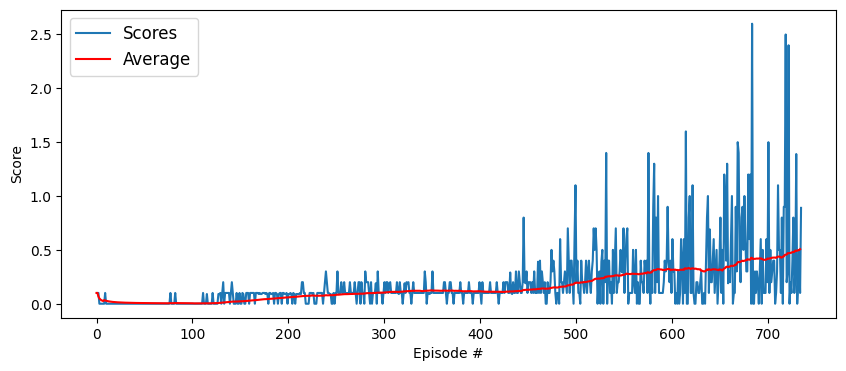

In [16]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores, label='Scores')
plt.plot(np.arange(len(scores)), averages, c='r', label='Average')
plt.ylabel('Score')
plt.xlabel('Episode #')
ax.legend(fontsize='large', loc='upper left')
plt.show()

In [17]:
agent = Agent(state_size = state_size, action_size = action_size, random_seed = 0, num_agents=2)
scores, averages = agent.train(env, n_episodes=1000, apply_noise_decay=True, checkpoint_file='checkpoint_noise_decay.pt')

Episode 10, Average Score: 0.00, Max: 0.00, Min: 0.00, Avg: 0.00, Time: 0.70
Episode 20, Average Score: 0.00, Max: 0.00, Min: 0.00, Avg: 0.00, Time: 0.50
Episode 30, Average Score: 0.01, Max: 0.09, Min: 0.00, Avg: 0.02, Time: 0.51
Episode 40, Average Score: 0.00, Max: 0.00, Min: 0.00, Avg: 0.00, Time: 0.50
Episode 50, Average Score: 0.01, Max: 0.10, Min: 0.00, Avg: 0.01, Time: 0.54
Episode 60, Average Score: 0.00, Max: 0.00, Min: 0.00, Avg: 0.00, Time: 0.59
Episode 70, Average Score: 0.00, Max: 0.00, Min: 0.00, Avg: 0.00, Time: 0.50
Episode 80, Average Score: 0.00, Max: 0.00, Min: 0.00, Avg: 0.00, Time: 0.50
Episode 90, Average Score: 0.00, Max: 0.00, Min: 0.00, Avg: 0.00, Time: 0.50
Episode 100, Average Score: 0.00, Max: 0.00, Min: 0.00, Avg: 0.00, Time: 0.51
Episode 110, Average Score: 0.00, Max: 0.00, Min: 0.00, Avg: 0.00, Time: 0.51
Episode 120, Average Score: 0.01, Max: 0.10, Min: 0.00, Avg: 0.09, Time: 1.02
Episode 130, Average Score: 0.01, Max: 0.10, Min: 0.00, Avg: 0.01, Time: 

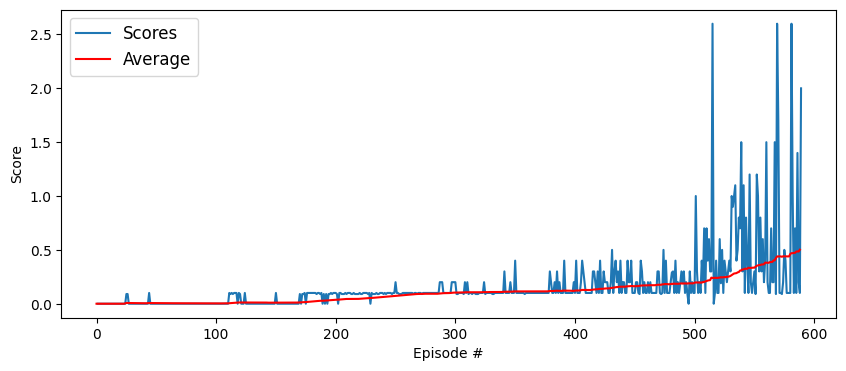

In [18]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores, label='Scores')
plt.plot(np.arange(len(scores)), averages, c='r', label='Average')
plt.ylabel('Score')
plt.xlabel('Episode #')
ax.legend(fontsize='large', loc='upper left')
plt.show()

In [19]:

#load the weights from file
agent = Agent(state_size = state_size, action_size = action_size, random_seed = 0, num_agents=2)
agent.load(file='checkpoint.pt')
agent.test(env, n_episodes=5)

Total score (averaged over agents) this episode: 2.600000038743019
Total score (averaged over agents) this episode: 2.650000039488077
Total score (averaged over agents) this episode: 2.600000038743019
Total score (averaged over agents) this episode: 2.650000039488077
Total score (averaged over agents) this episode: 2.650000039488077


In [20]:
agent = Agent(state_size = state_size, action_size = action_size, random_seed = 0, num_agents=2)
agent.load(file='checkpoint_noise_decay.pt')
agent.test(env, n_episodes=5)


Total score (averaged over agents) this episode: 2.600000038743019
Total score (averaged over agents) this episode: 2.650000039488077
Total score (averaged over agents) this episode: 0.09500000160187483
Total score (averaged over agents) this episode: 2.600000038743019
Total score (averaged over agents) this episode: 2.650000039488077


In [21]:
env.close()